# Clustering Crypto

In [81]:
# Initial imports
import pandas as pd
import plotly.express as px

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [83]:
from yellowbrick.cluster import KElbowVisualizer

In [84]:
pip install --upgrade hvplot

Requirement already up-to-date: hvplot in /opt/anaconda3/lib/python3.8/site-packages (0.7.1)
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install --upgrade bokeh

Requirement already up-to-date: bokeh in /opt/anaconda3/lib/python3.8/site-packages (2.3.1)
Note: you may need to restart the kernel to use updated packages.


In [86]:
import hvplot.pandas

### Deliverable 1: Preprocessing the Data for PCA

In [87]:
# Load the crypto_data.csv dataset.
# Load the crypto_data.csv dataset.
file_path = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [88]:
# Keep all the cryptocurrencies that are being traded.
crypto_df_true = crypto_df[crypto_df['IsTrading']==True]
print(crypto_df_true.shape)

(1144, 6)


In [89]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df_new = crypto_df_true.loc[crypto_df_true['Algorithm'] != 'N/A']
print(crypto_df_new.shape)

(1144, 6)


In [90]:
# Remove the "IsTrading" column. 
crypto_df_new.drop(columns=["IsTrading"], inplace=True)
print(crypto_df_new.shape)

(1144, 5)


In [91]:
# Remove rows that have at least 1 null value.
for column in crypto_df_new.columns:
    print(f"Column {column} has {crypto_df_new[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [92]:
crypto_df_new = crypto_df_new.dropna()
print(crypto_df_new.shape)

(685, 5)


In [93]:
# Keep the rows where coins are mined.
col = 'TotalCoinsMined'
crypto_df_new = crypto_df_new[crypto_df_new[col] > 0]
crypto_df_new.dropna().shape

(532, 5)

In [94]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coins_df = pd.DataFrame(crypto_df_new["CoinName"],index=crypto_df_new.index).copy()
print(coins_df.shape)
coins_df

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [95]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df_new.drop(columns=["CoinName"],inplace=True)
print(crypto_df_new.shape)
crypto_df_new

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [96]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df_new,columns=["Algorithm","ProofType"])
print(X.shape)

(532, 98)


In [97]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [98]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

# Get three principal components for the crypto data.
crypto = pca.fit_transform(X_scaled)

In [99]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=crypto, columns=["PC 1", "PC 2", "PC 3"], index=crypto_df_new.index
)
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.335446,0.951686,-0.562844
404,-0.318685,0.952513,-0.563222
1337,2.302539,1.557013,-0.689201
BTC,-0.135339,-1.258129,0.187930
ETH,-0.119916,-1.894164,0.300609


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

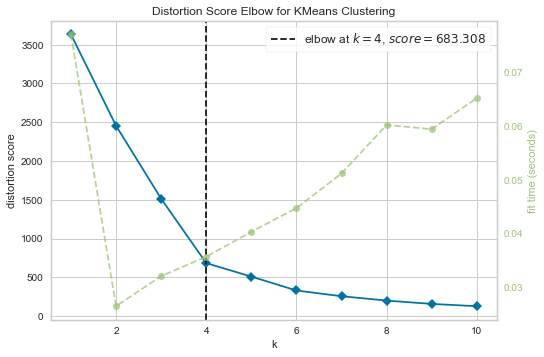

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
# Create an elbow curve to find the best value for K.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

# Fit the data to the visualizer
visualizer.fit(pcs_df)
 # Finalize and render the figure
visualizer.show()   

Running K-Means with `k=4`

In [101]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 3 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 3 3 1 1 1 0 3 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 3 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [102]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df_new, pcs_df], axis=1)
clustered_df.head()

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = pd.Series(coins_df['CoinName'])

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.335446,0.951686,-0.562844,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.318685,0.952513,-0.563222,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302539,1.557013,-0.689201,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.135339,-1.258129,0.187930,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.119916,-1.894164,0.300609,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.131731,-0.999549,-0.031591,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.422470,1.081083,-0.439244,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.121062,-2.093009,0.376232,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.118347,-1.894190,0.300599,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.101207,-1.956127,0.344111,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [103]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=1000,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [104]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [105]:
# Print the total number of tradable cryptocurrencies.
print(clustered_df["CoinName"].shape)

(532,)


In [106]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
min_max_scaler = MinMaxScaler()
scaled_data = clustered_df[["TotalCoinSupply", "TotalCoinsMined"]] = min_max_scaler.fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])

In [114]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(scaled_data, index=clustered_df.index, columns=
                   ["TotalCoinSupply", "TotalCoinsMined"])

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = pd.Series(clustered_df['CoinName'])

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = pd.Series(clustered_df['Class'])

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1
LTC,8.400000e-05,0.000064,Litecoin,1
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,1
ETC,2.100000e-04,0.000115,Ethereum Classic,1
ZEC,2.100000e-05,0.000007,ZCash,1


In [116]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    hover_cols=["CoinName"],
    by="Class",
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)